<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>3. Exploratory Data Analysis </h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
#import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h2> 3.1 Reading data and basic stats </h2>

In [2]:
import os
os.chdir("C:\\Users\\suman\\Downloads\\appliedaidataset\\Quora")
df = pd.read_csv("train.csv")

#smuk
#_ , df = train_test_split(df, test_size = 500, random_state=0,stratify = df['is_duplicate'] )

print("Number of data points:",df.shape[0])

Number of data points: 404290


In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

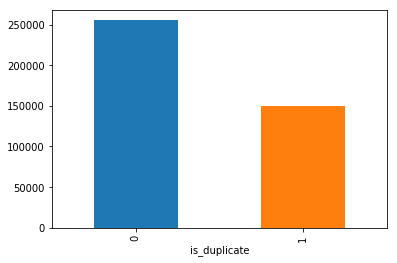

In [5]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [6]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   404290


In [7]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


<h3> 3.2.2 Number of unique questions </h3>

In [8]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



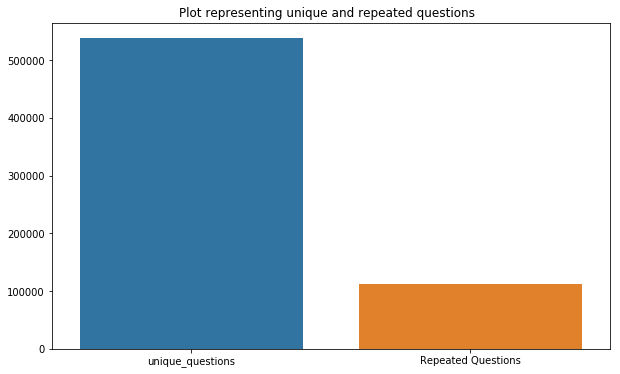

In [9]:

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

<h3>3.2.3 Checking for Duplicates </h3>

In [10]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 157



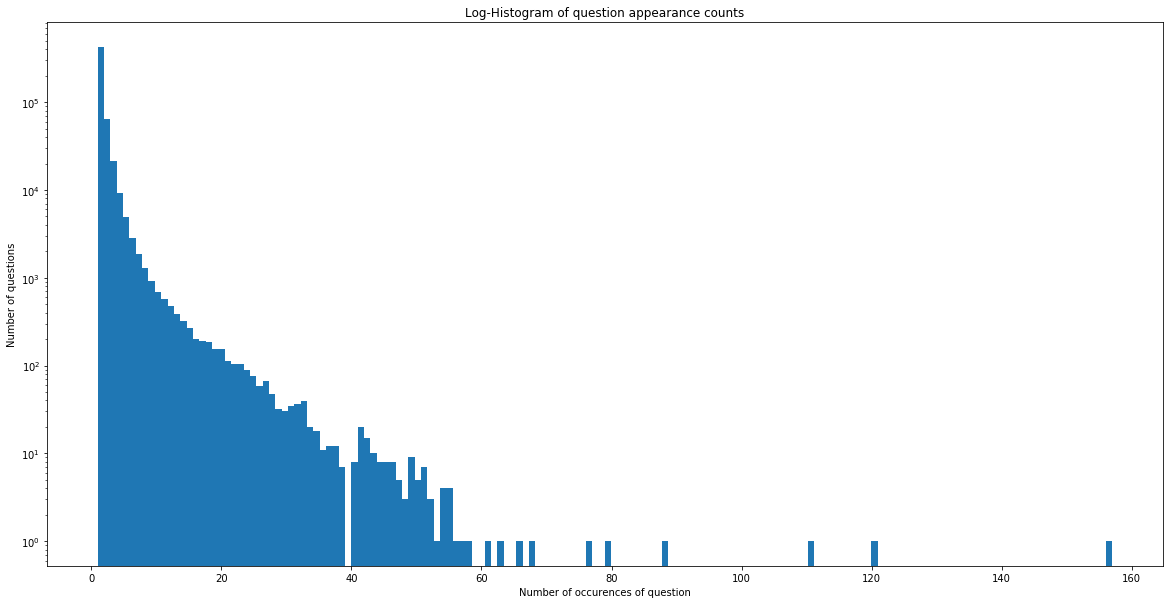

In [11]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

<h3> 3.2.5 Checking for NULL values </h3>

In [12]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


- There are 2 rows with null values in question2 and one in question1 

In [13]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


## Split train and test before preprocessing considering test as unseen


In [14]:
print(df.shape)
print(df['is_duplicate'].value_counts())
y_true=df['is_duplicate']
random_state=42
df,df_test, y_train, y_test = train_test_split(df, y_true, stratify=y_true, test_size=0.3,random_state=random_state)
print(df.shape,df_test.shape)
print(df['is_duplicate'].value_counts())
print(df_test['is_duplicate'].value_counts())
df.head()
df_test.head()
df_orig=df
df_test_orig=df_test

(404290, 6)
0    255027
1    149263
Name: is_duplicate, dtype: int64
(283003, 6) (121287, 6)
0    178519
1    104484
Name: is_duplicate, dtype: int64
0    76508
1    44779
Name: is_duplicate, dtype: int64


<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [15]:
df=df_orig
df_test=df_test_orig
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
223376,223376,11069,240809,How do I gain healthy weight without eating junk?,What are the healthy ways of gaining weight an...,1,6,3,49,56,9,10,2.0,19.0,0.105263,9,3
3424,3424,6787,6788,What is unusual or different about the food an...,What is unusual or different about the food an...,0,1,5,67,65,12,12,11.0,24.0,0.458333,6,4
103225,103225,170658,170659,How can I make music player with sensor in and...,How can I make music player for android?,0,1,1,51,40,10,8,7.0,18.0,0.388889,2,0
227557,227557,336441,336442,How much can you charge for a website?,How much I can charge for a website?,1,1,1,38,36,8,8,7.0,16.0,0.437500,2,0
299469,299469,51302,226085,How can I treat a swollen clitoris?,How do you treat a swollen tongue?,0,1,2,35,34,7,7,4.0,14.0,0.285714,3,1


In [16]:
if os.path.isfile('df_fe_without_preprocessing_test.csv'):
    df_test = pd.read_csv("df_fe_without_preprocessing_test.csv",encoding='latin-1')
else:
    df_test['freq_qid1'] = df_test.groupby('qid1')['qid1'].transform('count') 
    df_test['freq_qid2'] = df_test.groupby('qid2')['qid2'].transform('count')
    df_test['q1len'] = df_test['question1'].str.len() 
    df_test['q2len'] = df_test['question2'].str.len()
    df_test['q1_n_words'] = df_test['question1'].apply(lambda row: len(row.split(" ")))
    df_test['q2_n_words'] = df_test['question2'].apply(lambda row: len(row.split(" ")))
    df_test['word_Common'] = df_test.apply(normalized_word_Common, axis=1)
    df_test['word_Total'] = df_test.apply(normalized_word_Total, axis=1)
    df_test['word_share'] = df_test.apply(normalized_word_share, axis=1)

    df_test['freq_q1+q2'] = df_test['freq_qid1']+df_test['freq_qid2']
    df_test['freq_q1-q2'] = abs(df_test['freq_qid1']-df_test['freq_qid2'])

    df_test.to_csv("df_fe_without_preprocessing_test.csv", index=False)

df_test.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
380200,380200,398338,511809,Was it appropriate for Meryl Streep to use her...,Should Meryl Streep be using her position to a...,1,2,1,91,66,16,11,5.0,26.0,0.192308,3,1
345456,345456,120456,473749,I have forgot the screen unlock PIN code of my...,How do I unlock my HTC 2200?,0,3,1,76,28,17,7,4.0,22.0,0.181818,4,2
219262,219262,326090,326091,What book do you want to read?,How do you choose what books you read?,0,1,1,30,38,7,8,4.0,14.0,0.285714,2,0
231835,231835,341728,341729,How do you know what is true and what is not?,How do we know what is true and what is not?,1,1,1,45,44,11,11,8.0,18.0,0.444444,2,0
316926,316926,314306,442046,I've seen bald men treated equally as others i...,What do Indian guys think of beautiful bald gi...,0,1,1,99,50,19,9,5.0,28.0,0.178571,2,0


<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [17]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 55
Number of Questions with minimum length [question2] : 18


<h4> 3.3.1.1 Feature: word_share </h4>

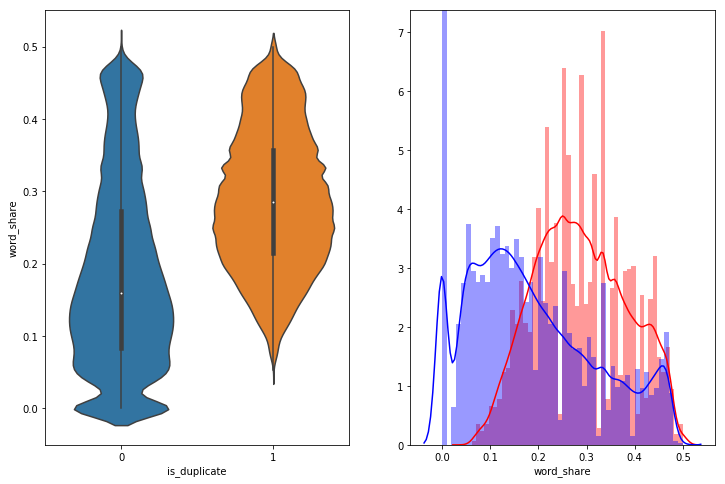

In [18]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> 3.3.1.2 Feature: word_Common </h4>

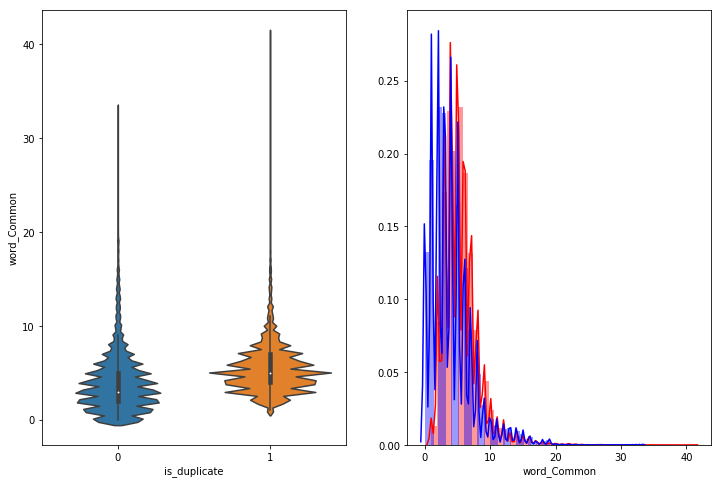

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping </p>

<h2> 3.4 Preprocessing of Text </h2>
- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [20]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2
    
<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [21]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [22]:
#pip install distance from anaconda prompt
import distance
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = df_orig #pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

Extracting features for train:
token features...
fuzzy features..


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
223376,223376,11069,240809,how do i gain healthy weight without eating junk,what are the healthy ways of gaining weight an...,1,6,3,49,56,...,0.199998,0.0,0.0,1.0,9.5,60,60,49,51,0.200000
3424,3424,6787,6788,what is unusual or different about the food an...,what is unusual or different about the food an...,0,1,5,67,65,...,0.916659,0.0,1.0,0.0,12.0,95,89,94,92,0.893939


In [23]:
if os.path.isfile('nlp_features_test.csv'):
    df_test = pd.read_csv("nlp_features_test.csv",encoding='latin-1')
    df_test.fillna('')
else:
    print("Extracting features for test:")
    df_test = df_test_orig
    df_test = extract_features(df_test)
    df_test.to_csv("nlp_features_test.csv", index=False)
df_test.head(2)

Extracting features for test:
token features...
fuzzy features..


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
380200,380200,398338,511809,was it appropriate for meryl streep to use her...,should meryl streep be using her position to a...,1,2,1,91,66,...,0.312498,0.0,0.0,5.0,13.5,64,52,52,58,0.208955
345456,345456,120456,473749,i have forgot the screen unlock pin code of my...,how do i unlock my htc 2200,0,3,1,76,28,...,0.294116,0.0,0.0,10.0,12.0,83,46,37,61,0.344828


<h3>3.5.1 Analysis of extracted features </h3>
<h4> 3.5.1.1 Plotting Word clouds</h4>
- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [26]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
#np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
#np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 208968
Number of data points in class 0 (non duplicate pairs) : 357038


In [27]:
df_duplicate = df_test[df_test['is_duplicate'] == 1]
dfp_nonduplicate = df_test[df_test['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
#np.savetxt('test_p.txt', p, delimiter=' ', fmt='%s')
#np.savetxt('test_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 89558
Number of data points in class 0 (non duplicate pairs) : 153016


In [29]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

#textp_w = open(path.join(d, 'train_p.txt'),encoding="utf8").read()
#textn_w = open(path.join(d, 'train_n.txt'),encoding="utf8").read()
textp_w = p
textn_w = n
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 89558
Total number of words in non duplicate pair questions : 153016


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


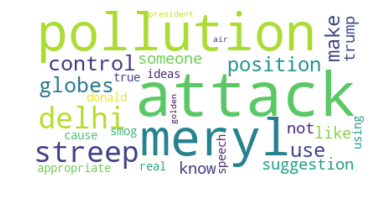

In [32]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(str(textp_w))
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


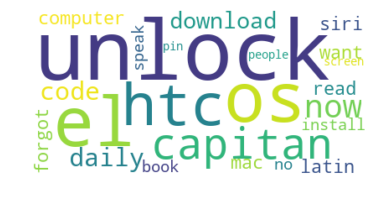

In [33]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(str(textn_w))
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

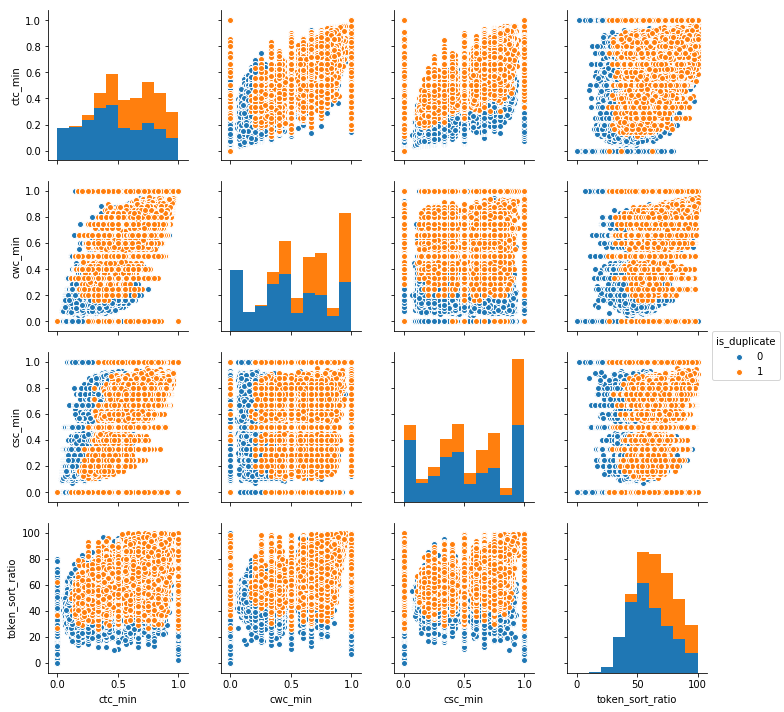

In [35]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

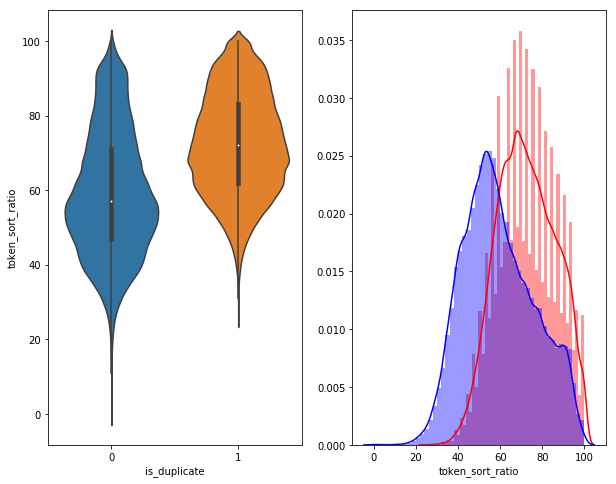

In [36]:
# Distribution of the token_sort_ratio
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

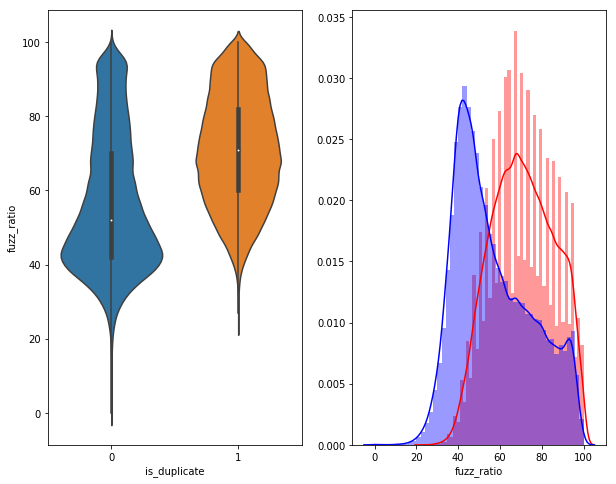

In [37]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

<h3>3.5.2 Visualization </h3>

In [38]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [39]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.031s...
[t-SNE] Computed neighbors for 5000 samples in 0.802s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.123481
[t-SNE] Computed conditional probabilities in 0.898s
[t-SNE] Iteration 50: error = 82.6123505, gradient norm = 0.0474997 (50 iterations in 24.744s)
[t-SNE] Iteration 100: error = 70.6298904, gradient norm = 0.0095853 (50 iterations in 16.056s)
[t-SNE] Iteration 150: error = 68.7998352, gradient norm = 0.0063477 (50 iterations in 14.468s)
[t-SNE] Iteration 200: error = 68.0060120, gradient norm = 0.0041359 (50 iterations in 15.633s)
[t-SNE] Iteration 250: error = 67.5253677, gradient norm = 0.003

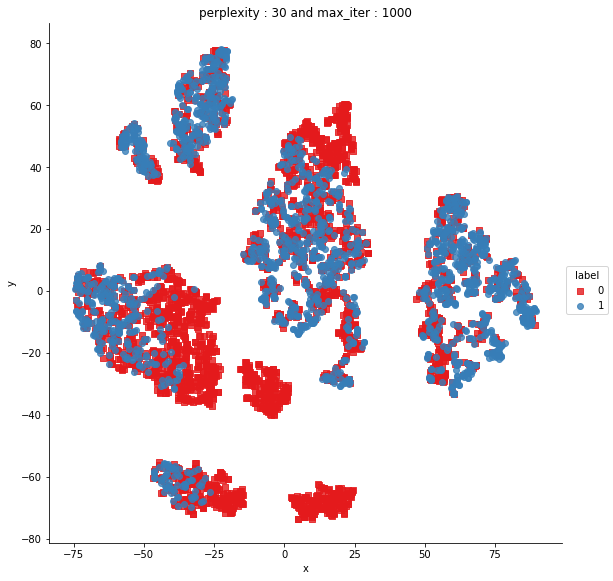

In [40]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [41]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.064s...
[t-SNE] Computed neighbors for 5000 samples in 1.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.123481
[t-SNE] Computed conditional probabilities in 0.533s
[t-SNE] Iteration 50: error = 81.6401291, gradient norm = 0.0438655 (50 iterations in 37.469s)
[t-SNE] Iteration 100: error = 69.1498947, gradient norm = 0.0034920 (50 iterations in 18.647s)
[t-SNE] Iteration 150: error = 67.8883896, gradient norm = 0.0017686 (50 iterations in 18.186s)
[t-SNE] Iteration 200: error = 67.2920761, gradient norm = 0.0011671 (50 iterations in 17.463s)
[t-SNE] Iteration 250: error = 66.9400787, gradient norm = 0.000

In [42]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [43]:
# avoid decoding problems
os.chdir("C:\\Users\\suman\\Downloads\\appliedaidataset\\Quora")
df = df_orig #pd.read_csv("train.csv")
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
223376,223376,11069,240809,how do i gain healthy weight without eating junk,what are the healthy ways of gaining weight an...,1,6,3,49,56,...,0.199998,0.0,0.0,1.0,9.5,60,60,49,51,0.200000
3424,3424,6787,6788,what is unusual or different about the food an...,what is unusual or different about the food an...,0,1,5,67,65,...,0.916659,0.0,1.0,0.0,12.0,95,89,94,92,0.893939
103225,103225,170658,170659,how can i make music player with sensor in and...,how can i make music player for android,0,1,1,51,40,...,0.699993,1.0,1.0,2.0,9.0,95,79,85,80,0.682927
227557,227557,336441,336442,how much can you charge for a website,how much i can charge for a website,1,1,1,38,36,...,0.874989,1.0,1.0,0.0,8.0,97,92,92,89,0.594595
299469,299469,51302,226085,how can i treat a swollen clitoris,how do you treat a swollen tongue,0,1,2,35,34,...,0.571420,0.0,1.0,0.0,7.0,73,63,72,71,0.485714


In [44]:
df_test = df_test_orig
df_test['question1'] = df_test['question1'].apply(lambda x: str(x))
df_test['question2'] = df_test['question2'].apply(lambda x: str(x))
df_test.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
380200,380200,398338,511809,was it appropriate for meryl streep to use her...,should meryl streep be using her position to a...,1,2,1,91,66,...,0.312498,0.0,0.0,5.0,13.5,64,52,52,58,0.208955
345456,345456,120456,473749,i have forgot the screen unlock pin code of my...,how do i unlock my htc 2200,0,3,1,76,28,...,0.294116,0.0,0.0,10.0,12.0,83,46,37,61,0.344828


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
#word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))


<566006x73869 sparse matrix of type '<class 'numpy.float64'>'
	with 5724326 stored elements in Compressed Sparse Row format>

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia and therefore, it is stronger in terms of word semantics. 

In [46]:
#This step takes huge time
from scipy.sparse import csr_matrix,coo_matrix
from sklearn.cross_validation import train_test_split
#df_all=df
from scipy.sparse import hstack
tf_idf_vect2 = TfidfVectorizer(ngram_range=(1,3),min_df = 5,max_features = 50000)
final_tf_idf2 = tf_idf_vect2.fit_transform(df['question2'])
tf_idf_vect1 = TfidfVectorizer(ngram_range=(1,3),min_df = 5,max_features = 50000)
final_tf_idf1 = tf_idf_vect1.fit_transform(df['question1'])
print(final_tf_idf1.shape,final_tf_idf2.shape,df.shape)
df=df.drop(['id','question1','question2','qid1','qid2','is_duplicate'],axis=1)
dense_matrix = np.array(df.as_matrix(columns = None), dtype=float).astype(np.float)
sparse_matrix = csr_matrix(dense_matrix)
dfnew=hstack((sparse_matrix, final_tf_idf1,final_tf_idf2)).tocsr()
print(dfnew.shape)

(283003, 50000) (283003, 50000) (283003, 32)
(283003, 100026)


In [47]:
#This step takes huge time
final_tf_idf2 = tf_idf_vect2.transform(df_test['question2'])
final_tf_idf1 = tf_idf_vect1.transform(df_test['question1'])
print(final_tf_idf1.shape,final_tf_idf2.shape,df_test.shape)
df_test=df_test.drop(['id','question1','question2','qid1','qid2','is_duplicate'],axis=1)
dense_matrix = np.array(df_test.as_matrix(columns = None), dtype=float).astype(np.float)
sparse_matrix = csr_matrix(dense_matrix)
dfnew_test=hstack((sparse_matrix, final_tf_idf1,final_tf_idf2)).tocsr()
print(dfnew_test.shape)

(121287, 50000) (121287, 50000) (121287, 32)
(121287, 100026)


In [48]:
df=dfnew
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")
    
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df    

In [49]:
# dataframe of nlp features
df1.head()

,id,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,223376,1,6,3,49,56,9,10,2.0,19.0,...,0.199998,0.0,0.0,1.0,9.5,60,60,49,51,0.200000
1,3424,0,1,5,67,65,12,12,11.0,24.0,...,0.916659,0.0,1.0,0.0,12.0,95,89,94,92,0.893939
2,103225,0,1,1,51,40,10,8,7.0,18.0,...,0.699993,1.0,1.0,2.0,9.0,95,79,85,80,0.682927
3,227557,1,1,1,38,36,8,8,7.0,16.0,...,0.874989,1.0,1.0,0.0,8.0,97,92,92,89,0.594595
4,299469,0,1,2,35,34,7,7,4.0,14.0,...,0.571420,0.0,1.0,0.0,7.0,73,63,72,71,0.485714


In [50]:
# data before preprocessing 
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,223376,6,3,49,56,9,10,2.0,19.0,0.105263,9,3
1,3424,1,5,67,65,12,12,11.0,24.0,0.458333,6,4
2,103225,1,1,51,40,10,8,7.0,18.0,0.388889,2,0
3,227557,1,1,38,36,8,8,7.0,16.0,0.437500,2,0
4,299469,1,2,35,34,7,7,4.0,14.0,0.285714,3,1


In [51]:
print("Number of features in nlp dataframe :", df1.shape)
print("Number of features in preprocessed dataframe :", df2.shape)
print("Number of features in tfidf for Q1 and Q2 :", df3.shape)
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3.shape[1])

Number of features in nlp dataframe : (283003, 28)
Number of features in preprocessed dataframe : (283003, 12)
Number of features in tfidf for Q1 and Q2 : (283003, 100026)
Number of features in final dataframe  : 100066


In [52]:
# storing the final features to csv file
from scipy import sparse
import os
os.chdir("C:\\Users\\suman\\Downloads\\appliedaidataset\\Quora")

#if not os.path.isfile('final_features.csv'):
if not os.path.isfile('dfnew.npz'):
    df1  = df1.merge(df2, on='id',how='left')
    print(df1.head())
    df1=df1.drop(['id'],axis=1)
    print(df1.shape,df1.shape)
    dense_matrix = np.array(df1.as_matrix(columns = None), dtype=float).astype(np.float)
    sparse_matrix = csr_matrix(dense_matrix)
    dfnew=hstack((sparse_matrix, df3)).tocsr()
    print("final shape",dfnew.shape)
    sparse.save_npz("dfnew.npz", dfnew)
else:
    your_matrix_back = sparse.load_npz("dfnew.npz")
    print(your_matrix_back.shape)


       id  is_duplicate  freq_qid1_x  freq_qid2_x  q1len_x  q2len_x  \
0  223376             1            6            3       49       56   
1    3424             0            1            5       67       65   
2  103225             0            1            1       51       40   
3  227557             1            1            1       38       36   
4  299469             0            1            2       35       34   

   q1_n_words_x  q2_n_words_x  word_Common_x  word_Total_x      ...       \
0             9            10            2.0          19.0      ...        
1            12            12           11.0          24.0      ...        
2            10             8            7.0          18.0      ...        
3             8             8            7.0          16.0      ...        
4             7             7            4.0          14.0      ...        

   freq_qid2_y  q1len_y  q2len_y  q1_n_words_y  q2_n_words_y  word_Common_y  \
0            3       49       56     

SMUK
3 dataframe are created seperately from df_orig and df_test_orig
first feathres: df_fe_without_preprocessing_test.csv
second: nlp_features_test.csv
third: dfnew_test

In [53]:
df_test=dfnew_test
if os.path.isfile('nlp_features_test.csv'):
    dfnlp_test = pd.read_csv("nlp_features_test.csv",encoding='latin-1')
else:
    print("download nlp_features_test.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_test.csv'):
    dfppro_test = pd.read_csv("df_fe_without_preprocessing_test.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_test.csv from drive or run previous notebook")
    
df1_test = dfnlp_test.drop(['qid1','qid2','question1','question2'],axis=1)
df2_test = dfppro_test.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_test = df_test    

print("Number of features in nlp dataframe :", df1_test.shape)
print("Number of features in preprocessed dataframe :", df2_test.shape)
print("Number of features in tfidf for Q1 and Q2 :", df3_test.shape)
print("Number of features in final dataframe  :", df1_test.shape[1]+df2_test.shape[1]+df3_test.shape[1])

if not os.path.isfile('dfnew_test.npz'):
    df1_test  = df1_test.merge(df2_test, on='id',how='left')
    df1_test=df1_test.drop(['id'],axis=1)
    dense_matrix = np.array(df1_test.as_matrix(columns = None), dtype=float).astype(np.float)
    sparse_matrix = csr_matrix(dense_matrix)
    dfnew_test=hstack((sparse_matrix, df3_test)).tocsr()
    print("final shape",dfnew_test.shape)
    sparse.save_npz("dfnew_test.npz", dfnew_test)
else:
    your_matrix_back = sparse.load_npz("dfnew_test.npz")
    print(your_matrix_back.shape)


Number of features in nlp dataframe : (121287, 28)
Number of features in preprocessed dataframe : (121287, 12)
Number of features in tfidf for Q1 and Q2 : (121287, 100026)
Number of features in final dataframe  : 100066
final shape (121287, 100064)


<h1>4. Machine Learning Models </h1>
#<h2> 4.1 Reading data from file  </h2>


In [54]:
from scipy import sparse
data = sparse.load_npz("dfnew.npz")
data_test = sparse.load_npz("dfnew_test.npz")
print(data.shape)
print(data.shape,type(data),y_train.shape)

(283003, 100064)
(283003, 100064) <class 'scipy.sparse.csr.csr_matrix'> (283003,)


<h2> 4.3 Random train cv split ( 80:20) </h2>

In [55]:
X_train=data
X_test=data_test
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [65]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in CV data :",X_cv.shape)
print("Number of data points in test data :",X_test.shape)
print("Number of data points in train data y :",y_train.shape)
print("Number of data points in CV data y:",y_cv.shape)
print("Number of data points in test data y:",y_test.shape)

Number of data points in train data : (226402, 100064)
Number of data points in CV data : (56601, 100064)
Number of data points in test data : (121287, 100064)
Number of data points in train data y : (226402,)
Number of data points in CV data y: (56601,)
Number of data points in test data y: (121287,)


In [57]:
from collections import Counter
from scipy.sparse import hstack

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308027314246341 Class 1:  0.36919726857536594
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [58]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8875428405685961


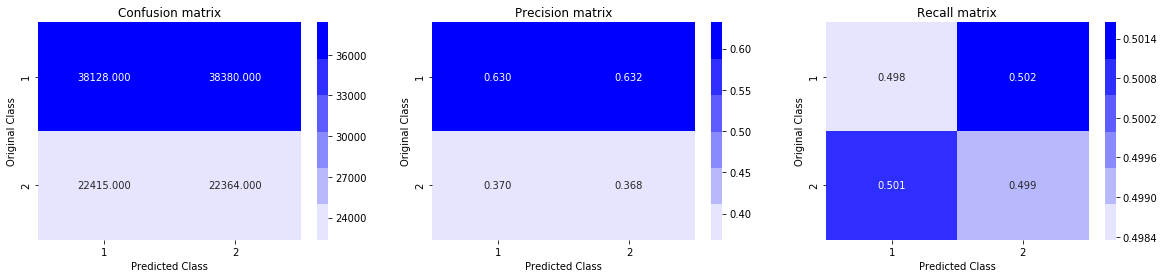

In [59]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
from sklearn.metrics.classification import accuracy_score, log_loss
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))
loss=log_loss(y_test, predicted_y, eps=1e-15)
predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

xx='na'
aa=pd.DataFrame()
bb=pd.DataFrame({'type':['Random Model'],'hyperparameter':[xx],'log loss CV':['na'], \
                   'log loss Test':[loss]})
aa=aa.append(bb)




<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.6585278256383833
For values of alpha =  0.0001 The log loss is: 0.4039998687517168
For values of alpha =  0.001 The log loss is: 0.0022471224389829635
For values of alpha =  0.01 The log loss is: 0.0018200913313758962
For values of alpha =  0.1 The log loss is: 0.21813046944676817
For values of alpha =  1 The log loss is: 0.49132786780940507
For values of alpha =  10 The log loss is: 0.5617107357887651


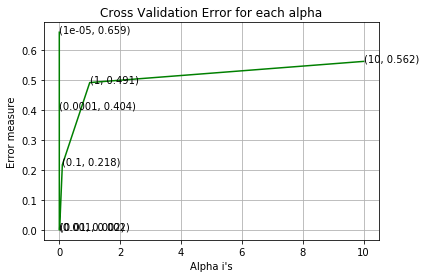

For values of best alpha =  0.01 The train log loss is: 0.0027240867999362667
For values of best alpha =  0.01 The test log loss is: 0.0018200913313758962
Total number of data points : 121287


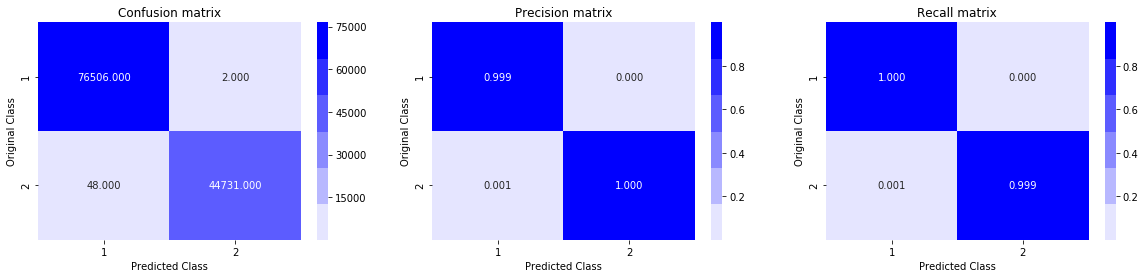

In [60]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

xx='alpha='+str(alpha[best_alpha])
bb=pd.DataFrame({'type':['Logistic'],'hyperparameter':[xx],'log loss CV':[log_loss(y_cv, sig_clf.predict_proba(X_cv))], \
                   'log loss Test':[log_loss(y_test, sig_clf.predict_proba(X_test))]})
aa=aa.append(bb)


predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.007939027547174573
For values of alpha =  0.0001 The log loss is: 0.08290243298215136
For values of alpha =  0.001 The log loss is: 0.2416494953332353
For values of alpha =  0.01 The log loss is: 0.3854599535812893
For values of alpha =  0.1 The log loss is: 0.18941354783332834
For values of alpha =  1 The log loss is: 0.6172632758323281
For values of alpha =  10 The log loss is: 0.6399318113819475


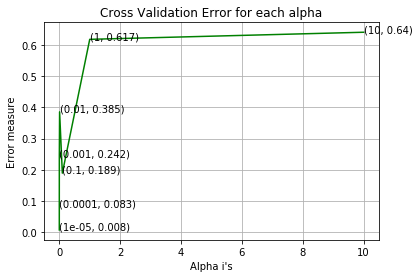

For values of best alpha =  1e-05 The train log loss is: 0.019061791458190726
For values of best alpha =  1e-05 The test log loss is: 0.007939027547174573
Total number of data points : 121287


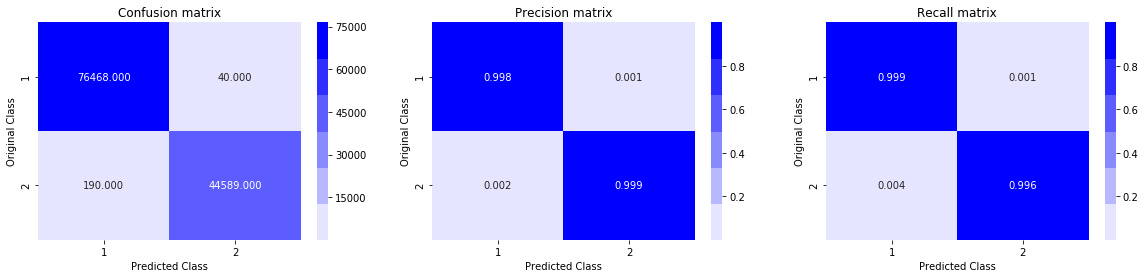

In [61]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

xx='alpha='+str(alpha[best_alpha])
bb=pd.DataFrame({'type':['Linear SVM'],'hyperparameter':[xx],'log loss CV':[log_loss(y_cv, sig_clf.predict_proba(X_cv))], \
                   'log loss Test':[log_loss(y_test, sig_clf.predict_proba(X_test))]})
aa=aa.append(bb)


predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [62]:
#from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
#installing xgboost was difficult, first install py-xgboost, then getting probelm for numpy and scipy related. so delete the folder in site pack
#ages and installed : pip installed xgboost-0.80-cp35-cp35m-win_amd64  : for python 3.5
from xgboost import XGBClassifier
#hyperparameter tunning
tuned_parameters={'learning_rate':[.1,.1],'n_estimators':[10,20,40],'max_depth':[6,8]}
model = RandomizedSearchCV(XGBClassifier(), tuned_parameters, random_state=1, scoring = 'f1', cv=5,n_iter=1)
print(X_train.shape,y_train.shape,type(X_train),type(y_train))
model.fit(X_train, y_train)


(226402, 100064) (226402,) <class 'scipy.sparse.csr.csr_matrix'> <class 'pandas.core.series.Series'>


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=1, n_jobs=1,
          param_distributions={'n_estimators': [10, 20, 40], 'learning_rate': [0.1, 0.1], 'max_depth': [6, 8]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [63]:
xx='learning_rate='+str(model.best_estimator_.learning_rate)+'n_estimator='+str(model.best_estimator_.n_estimators)+'max_depth='+str(model.best_estimator_.max_depth)
#execute till this smuk
model=XGBClassifier(learning_rate=model.best_estimator_.learning_rate,n_estimators=model.best_estimator_.n_estimators,max_depth=model.best_estimator_.max_depth)
model.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(model, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_test)
print('log loss',log_loss(y_test, sig_clf.predict_proba(X_test)))    
    
bb=pd.DataFrame({'type':['xgboost '],'hyperparameter':[xx],'log loss CV':[log_loss(y_cv, sig_clf.predict_proba(X_cv))], \
                   'log loss Test':[log_loss(y_test, sig_clf.predict_proba(X_test))]})
aa=aa.append(bb)


log loss 2.7392505111894546e-05


In [64]:
aa

,hyperparameter,log loss CV,log loss Test,type
0,na,na,0.887543,Random Model
0,alpha=0.01,0.00332043,0.001820,Logistic
0,alpha=1e-05,0.0185544,0.007939,Linear SVM
0,learning_rate=0.1n_estimator=40max_depth=6,2.73925e-05,0.000027,xgboost


<h1> Assignments </h1>
1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.
